# Train Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [6]:
times = [10, 15, 20, 25, 30, 35]
results = []
names = []

for time in times:
    file = "test_" + str(time) + "mins.csv"
    main = pd.read_csv(file)
    X = main.copy().drop(columns = ['blueWins', 'gameId'])
    Y = main.copy()['blueWins']
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state = 1)

    pipelines = []
    pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
    pipelines.append(('GBR', Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 40, loss = 'ls'))])))

    print("\nData", time, "mins - Test: ")
    for name, model in pipelines:
        kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)
        cv_result = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'r2')
        results.append(cv_result)
        names.append(name)
        msg = "%s:\t%f +/- (%f)" % (name, cv_result.mean(), cv_result.std())
        print(msg)


Data 10 mins - Test: 
LR:	0.275014 +/- (0.021484)
GBR:	0.277377 +/- (0.024628)

Data 15 mins - Test: 
LR:	0.394589 +/- (0.025496)
GBR:	0.418872 +/- (0.033551)

Data 20 mins - Test: 
LR:	0.461748 +/- (0.017319)
GBR:	0.483404 +/- (0.021478)

Data 25 mins - Test: 
LR:	0.508295 +/- (0.025482)
GBR:	0.523712 +/- (0.027176)

Data 30 mins - Test: 
LR:	0.484135 +/- (0.039475)
GBR:	0.504010 +/- (0.054428)

Data 35 mins - Test: 
LR:	0.413236 +/- (0.054270)
GBR:	0.411126 +/- (0.057650)


In [7]:
times = [10, 15, 20, 25, 30, 35]
results = []
names = []

for time in times:
    file = "test_" + str(time) + "mins.csv"
    main = pd.read_csv(file)
    X = main.copy().drop(columns = ['blueWins', 'gameId'])
    Y = main.copy()['blueWins']
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state = 1)

    pipelines = []
    pipelines.append(('LR', Pipeline([('PCA', PCA(n_components = 23)), ('LR',LinearRegression())])))
    pipelines.append(('GBR', Pipeline([('PCA', PCA(n_components = 23)), ('GBR', GradientBoostingRegressor(n_estimators = 40, loss = 'ls'))])))

    print("\nData", time, "mins - Test: ")
    for name, model in pipelines:
        kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)
        cv_result = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'r2')
        results.append(cv_result)
        names.append(name)
        msg = "%s:\t%f +/- (%f)" % (name, cv_result.mean(), cv_result.std())
        print(msg)


Data 10 mins - Test: 
LR:	0.275249 +/- (0.021682)
GBR:	0.279315 +/- (0.028212)

Data 15 mins - Test: 
LR:	0.394802 +/- (0.025301)
GBR:	0.419140 +/- (0.035337)

Data 20 mins - Test: 
LR:	0.461979 +/- (0.017610)
GBR:	0.483365 +/- (0.019911)

Data 25 mins - Test: 
LR:	0.507631 +/- (0.025282)
GBR:	0.527937 +/- (0.033697)

Data 30 mins - Test: 
LR:	0.482030 +/- (0.038144)
GBR:	0.495304 +/- (0.056544)

Data 35 mins - Test: 
LR:	0.409463 +/- (0.058324)
GBR:	0.382465 +/- (0.071636)


# Model Save

In [11]:
import pickle
from joblib import dump, load
import re

In [7]:
for time in times:
    file = "test_" + str(time) + "mins.csv"
    main = pd.read_csv(file)
    X = main.copy().drop(columns = ['blueWins', 'gameId'])
    Y = main.copy()['blueWins']
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state = 1)

    pipe = Pipeline([('PCA', PCA(n_components = 23)), ('GBR', GradientBoostingRegressor(n_estimators = 40, loss = 'ls'))])
    pipe.fit(X_train, Y_train)
    output = 'model_' + str(time) + 'mins.joblib'
    dump(pipe, output)

# Visualisation

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from heatmap import heatmap, corrplot
from joblib import dump, load

In [5]:
main = pd.read_csv("test_10mins.csv")
timelines = pd.read_csv('test.csv')

In [6]:
cols = list(main.keys())
cols.remove('gameId')
cols.remove('blueWins')

models = []
for time in [10, 15, 20, 25, 30, 35]:
    file = 'model_' + str(time) + 'mins.joblib'
    models.append(load(file))
models

[Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))]),
 Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))]),
 Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))]),
 Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))]),
 Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))]),
 Pipeline(steps=[('PCA', PCA(n_components=23)),
                 ('GBR', GradientBoostingRegressor(n_estimators=40))])]

In [7]:
def getdata(times, mins, cols):
    dic = {}
    for feature in cols:
        dic[feature] = 0
            
    b_level = 0
    r_level = 0

    for k,v in times[mins]['participantFrames'].items():
        #average level
        if(v['participantId'] <= 5 and  v['participantId'] >= 1):
            b_level += v['level']
            dic['blueTotalGold'] += v['totalGold']
            dic['blueTotalExperience'] += v['xp']
            dic['blueTotalMinionsKilled'] += v['minionsKilled']
            dic['blueTotalJungleMinionsKilled'] += v['jungleMinionsKilled']
        else:
            r_level += v['level']
            dic['redTotalGold'] += v['totalGold']
            dic['redTotalExperience'] += v['xp']
            dic['redTotalMinionsKilled'] += v['minionsKilled']
            dic['redTotalJungleMinionsKilled'] += v['jungleMinionsKilled']

    dic['blueAvgLevel'] = b_level / 5
    dic['blueGoldDiff'] = dic['blueTotalGold'] - dic['redTotalGold']
    dic['blueExperienceDiff'] = dic['blueTotalExperience'] - dic['redTotalExperience']
    dic['blueCSPerMin'] = dic['blueTotalMinionsKilled']/mins
    dic['blueGoldPerMin'] = dic['blueTotalGold']/mins

    dic['redAvgLevel'] = r_level / 5
    dic['redGoldDiff'] = -dic['blueGoldDiff']
    dic['redExperienceDiff'] = -dic['blueExperienceDiff']
    dic['redCSPerMin'] = dic['redTotalMinionsKilled'] / mins
    dic['redGoldPerMin'] = dic['redTotalGold'] / mins
    
    first = False
    for j in range(mins+1):
        for i in times[j]['events']: 
            if(i.get('type') == "WARD_PLACED" and i.get('creatorId') != 0):
                if(i.get('creatorId') <= 5):
                    dic['blueWardsPlaced'] += 1
                else :
                    dic['redWardsPlaced'] += 1
            elif(i.get('type') == "WARD_KILL" and i.get('killerId') != 0):
                if(i.get('killerId') <= 5):
                    dic['blueWardsDestroyed'] += 1
                else :
                    dic['redWardsDestroyed'] += 1
            elif(i.get('type') == "ELITE_MONSTER_KILL" and i.get('killerId') != 0):
                if(i.get('killerId') <= 5):
                    dic['blueEliteMonsters'] += 1
                    if(i.get('monsterType') == "DRAGON"):
                        dic['blueDragons'] += 1
                    elif(i.get('monsterType') == "RIFTHERALD"):
                        dic['blueHeralds'] += 1
                else :
                    dic['redEliteMonsters'] += 1
                    if(i.get('monsterType') == "DRAGON"):
                        dic['redDragons'] += 1
                    elif(i.get('monsterType') == "RIFTHERALD"):
                        dic['redHeralds'] += 1
            elif(i.get('type') == "CHAMPION_KILL" and i.get('killerId') != 0):
                if(i.get('killerId') <= 5):
                    if(not first):
                        dic['blueFirstBlood'] = 1
                    dic['blueKills'] += 1
                    dic['redDeaths'] += 1
                    dic['blueAssists'] += len(i.get('assistingParticipantIds'))
                else :
                    if(not first):
                        dic['redFirstBlood'] = 1
                    dic['redKills'] += 1
                    dic['blueDeaths'] += 1
                    dic['redAssists'] += len(i.get('assistingParticipantIds'))
                first=True
            elif(i.get('type') == "BUILDING_KILL" and 
                 i.get('buildingType') == "TOWER_BUILDING" and 
                 i.get('killerId') != 0):
                if(i.get('killerId') <= 5):
                    dic['blueTowersDestroyed'] += 1
                else:
                    dic['redTowersDestroyed'] += 1
    return dic

In [8]:
def influence(feature, models, frame, cols):
    times = eval(frame)
    duration = int(times[-1]['timestamp'] / 60000)
    features = []
    winrates = []
    
    for i in range(5, duration):
        l = [abs(i - j) for j in [10, 15, 20, 25, 30, 35]]
        model = models[l.index(min(l))]
        data = getdata(times, i, cols)
        features.append(data[feature])
        winrate = model.predict([list(data.values())])[0]
        winrates.append(winrate)
        
    return range(5, duration), features, winrates

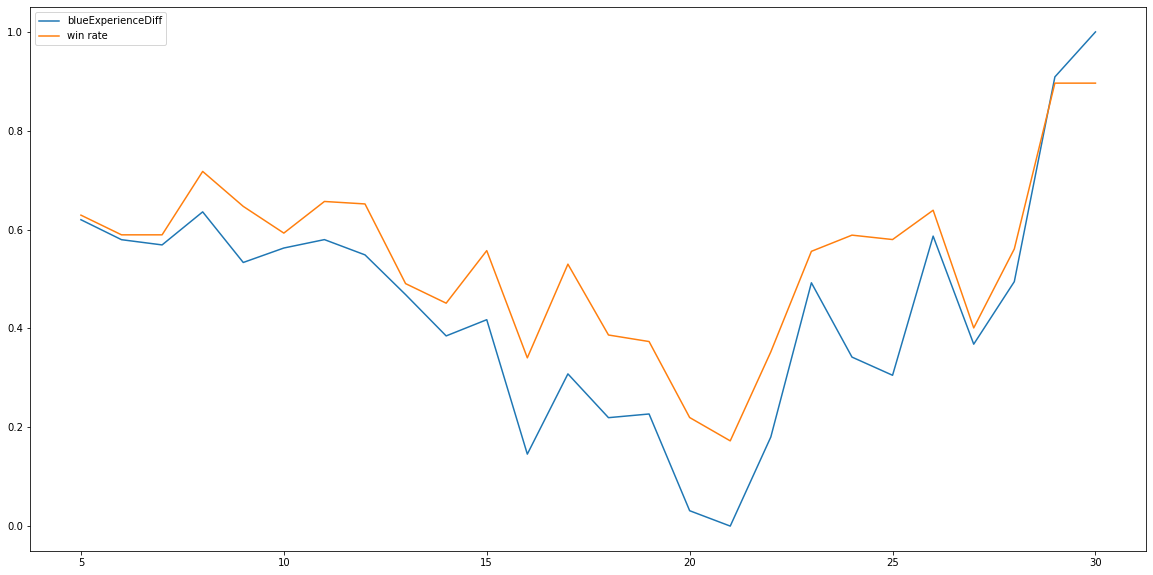

In [12]:
feature = 'blueExperienceDiff'

plt.figure(figsize=(20, 10))
time, features, winrates = influence(feature, models, timelines['frames'][5], cols)
normalized = [(i - min(features)) / (max(features) - min(features)) for i in features]
plt.plot(time, normalized, label = feature)
plt.plot(time, winrates, label = 'win rate')
plt.legend()

In [18]:
most_important_features = main.corr()['blueWins'].abs().sort_values(ascending=False)[:10]
most_important_features = list(most_important_features.index)
most_important_features.remove('blueWins')
l = [i for i in main.columns if re.match('red.*', i) != None]
most_important_features = [i for i in most_important_features if i not in l]
most_important_features

['blueGoldDiff',
 'blueExperienceDiff',
 'blueTotalGold',
 'blueGoldPerMin',
 'blueTotalExperience']

In [19]:
most_important_features.remove('blueTotalGold')
most_important_features.remove('blueTotalExperience')
most_important_features

['blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin']

In [15]:
def influences(features, models, frame, cols):
    times = eval(frame)
    duration = int(times[-1]['timestamp'] / 60000)
    varsfeatures = np.zeros((len(features), duration - 5))
    winrates = []
    
    for i in range(5, duration):
            l = [abs(i - j) for j in [10, 15, 20, 25, 30, 35]]
            model = models[l.index(min(l))]
            data = getdata(times, i, cols)
            winrate = model.predict([list(data.values())])[0]
            winrates.append(winrate)
            for index, feature in enumerate(features):
                varsfeatures[index][i - 5] = data[feature]
        
    return range(5, duration), varsfeatures, winrates

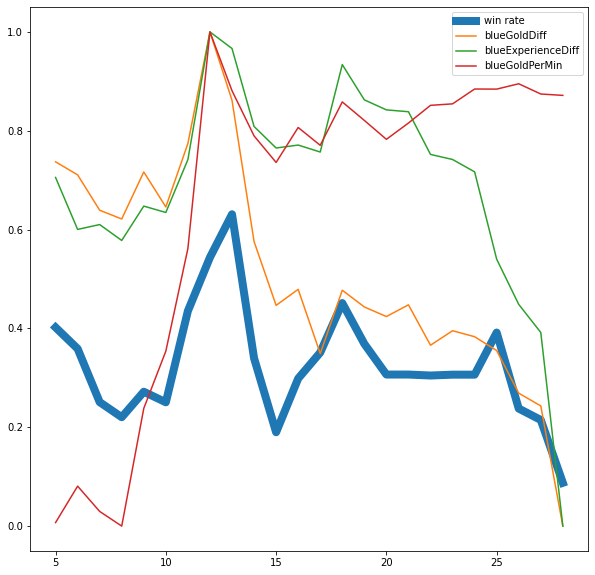

In [17]:
time, varsfeatures, winrates = influences(most_important_features, models, timelines['frames'][8], cols)

plt.figure(figsize=(10, 10))
plt.plot(time, winrates, label = 'win rate', linewidth = 8)

for i, j in enumerate(most_important_features):
    features = varsfeatures[i]
    normalized = [(i - min(features)) / (max(features) - min(features)) for i in features]
    plt.plot(time, normalized, label = j)

plt.legend()